[![logo](https://climate.copernicus.eu/sites/default/files/custom-uploads/branding/LogoLine_horizon_CAMS.png)](https://atmosphere.copernicus.eu)

<img src='https://www.actris.eu/sites/default/files/inline-images/Actris%20logo.png' width=200 align=right>

# Access ACTRIS In-Situ NRT data 

**Run the tutorial via free cloud platforms**: [![binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/ecmwf-training/cams-act6/main?labpath=02-in-situ/25_access_ACTRIS_in-situ_NRT_data_ACSM.ipynb)
[![kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/ecmwf-training/cams-act6/blob/main/02-in-situ/25_access_ACTRIS_in-situ_NRT_data_ACSM.ipynb)
[![colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ecmwf-training/cams-act6/blob/main/02-in-situ/25_access_ACTRIS_in-situ_NRT_data_ACSM.ipynb)

## Learning objectives

Participants can expect to achieve a comprehensive understanding of accessing and analyzing ACTRIS In-Situ NRT data using this notebook. By following the step-by-step instructions and code examples, participants will learn how to explore and download data, inspect and process the data, and visualize the results. The notebook provides a hands-on experience in working with multidimensional arrays, plotting and visualizing data, and utilizing various Python libraries such as xarray and matplotlib. Participants will gain valuable skills in data analysis and visualization, which can be applied to a wide range of scientific and research projects.


## Initial setup

Before we begin we must prepare our environment. This includes installing a thredds client and importing the various Python libraries that we will need.

In [1]:
!pip install threddsclient

### Import libraries

In [2]:
# Libraries for working with multidimensional arrays
import xarray as xr

# Libraries for plotting and visualising data
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import threddsclient

## Explore and download data

### Streaming of data

In [3]:
# Get the ACTRIS NRT thredds catalog
all_opendap_urls = threddsclient.opendap_urls('https://thredds.nilu.no/thredds/catalog/actris_nrt/catalog.xml')

In [4]:
# Get all ACSM opendap urls
acsm_opendap_urls = [x for x in all_opendap_urls if 'aerosol_mass_spectrometer' in x]
print('All In-Situ NRT ACSM datasets with opendap protocol: \n',acsm_opendap_urls)

All In-Situ NRT ACSM datasets with opendap protocol: 
 ['https://thredds.nilu.no/thredds/dodsC/actris_nrt/RO0010R.20240612110000.20240912133408.aerosol_mass_spectrometer...3mo.1h.RO03L_Aerodyne_Q-ACSM_140-172_NRT.RO03L_Aerodyne_Q-ACSM_.lev1.5.nc', 'https://thredds.nilu.no/thredds/dodsC/actris_nrt/NO0002R.20240618110000.20240912133606.aerosol_mass_spectrometer...3mo.1h.NO01L_Aerodyne_Q-ACSM_140-144_NRT.NO01L_Aerodyne_Q-ACSM_BIR.lev1.5.nc', 'https://thredds.nilu.no/thredds/dodsC/actris_nrt/IE0011U.20240612110000.20240912123605.aerosol_mass_spectrometer...3mo.1h.IE04L_Aerodyne_Q-ACSM_140-133_ACSMdry_NRT.IE04L_Aerodyne_Q-ACSM_.lev1.5.nc', 'https://thredds.nilu.no/thredds/dodsC/actris_nrt/FR0030R.20240612150000.20240904053802.aerosol_mass_spectrometer...12w.1h.FR04L_Aerodyne_Q-ACSM_140-142_NRT.FR01L_Ng_2011.lev1.5.nc', 'https://thredds.nilu.no/thredds/dodsC/actris_nrt/FR0020R.20240612110000.20240912123603.aerosol_mass_spectrometer...3mo.1h.FR01L_Aerodyne_Q-ACSM_140-113_NRT.FR01L_Aerodyne_Q-

In [5]:
# Get all ACSM opendap urls
acsm_birkenes = [x for x in acsm_opendap_urls if 'NO0002R' in x]
print('In-Situ NRT ACSM dataset at Birkenes II: \n',acsm_birkenes)

In-Situ NRT ACSM dataset at Birkenes II: 
 ['https://thredds.nilu.no/thredds/dodsC/actris_nrt/NO0002R.20240618110000.20240912133606.aerosol_mass_spectrometer...3mo.1h.NO01L_Aerodyne_Q-ACSM_140-144_NRT.NO01L_Aerodyne_Q-ACSM_BIR.lev1.5.nc']


## Inspect data

In [6]:
# Path to the ACSM dataset
acsm = acsm_birkenes[0]

# Create Xarray Dataset
ds = xr.open_dataset(acsm)

# view the dataset
ds

<xarray.Dataset>
Dimensions:                                                (time: 1423,
                                                            tbnds: 2,
                                                            metadata_time: 62,
                                                            Location: 1,
                                                            pressure_qc_flags: 1,
                                                            ammonium_ug_N_per_m3_amean_qc_flags: 1,
                                                            ...
                                                            organic_mass_amean_Fraction_qc_flags: 1,
                                                            organic_mass_uncertainty_Fraction_qc_flags: 1,
                                                            sulphate_total_ug_S_per_m3_amean_qc_flags: 1,
                                                            sulphate_total_ug_per_m3_amean_qc_flags: 1,
                                                            sulphate_total_ug_S_per_m3_uncertainty_qc_flags: 1,
                                                            sulphate_total_ug_per_m3_uncertainty_qc_flags: 1)
Coordinates:
  * time                                                   (time) datetime64[ns] ...
  * metadata_time                                          (metadata_time) datetime64[ns] ...
  * Location                                               (Location) |S64 b'...
  * Fraction                                               (Fraction) |S64 b'...
  * Fractionx                                              (Fractionx) |S64 b...
Dimensions without coordinates: tbnds, pressure_qc_flags,
                                ammonium_ug_N_per_m3_amean_qc_flags,
                                ammonium_ug_per_m3_amean_qc_flags,
                                ammonium_ug_N_per_m3_uncertainty_qc_flags,
                                ammonium_ug_per_m3_uncertainty_qc_flags,
                                chloride_amean_qc_flags,
                                ...
                                organic_mass_amean_Fraction_qc_flags,
                                organic_mass_uncertainty_Fraction_qc_flags,
                                sulphate_total_ug_S_per_m3_amean_qc_flags,
                                sulphate_total_ug_per_m3_amean_qc_flags,
                                sulphate_total_ug_S_per_m3_uncertainty_qc_flags,
                                sulphate_total_ug_per_m3_uncertainty_qc_flags
Data variables: (12/71)
    time_bnds                                              (time, tbnds) datetime64[ns] ...
    metadata_time_bnds                                     (metadata_time, tbnds) datetime64[ns] ...
    pressure_qc                                            (Location, pressure_qc_flags, time) float64 ...
    pressure_ebasmetadata                                  (Location, metadata_time) |S64 ...
    ammonium_ug_N_per_m3_amean                             (time) float64 ...
    ammonium_ug_N_per_m3_amean_qc                          (ammonium_ug_N_per_m3_amean_qc_flags, time) float64 ...
    ...                                                     ...
    nitrate_ug_N_per_m3_amean_Fraction                     (Fraction, time) float64 ...
    nitrate_ug_per_m3_amean_Fraction                       (Fraction, time) float64 ...
    nitrate_ug_N_per_m3_uncertainty_Fraction               (Fraction, time) float64 ...
    nitrate_ug_per_m3_uncertainty_Fraction                 (Fraction, time) float64 ...
    organic_mass_amean_Fraction                            (Fractionx, time) float64 ...
    organic_mass_uncertainty_Fraction                      (Fractionx, time) float64 ...
Attributes: (12/108)
    Conventions:                       CF-1.8, ACDD-1.3
    featureType:                       timeSeries
    title:                             Inorganics in air and particle phase a...
    keywords:                          nitrate, mass_concentration_

## Data processing, such as unit conversion, aggregation, etc.

## Data visualisation

In [7]:
variables2plot = []

# Iterate over each variable in the dataset
for v in list(ds.data_vars.keys()):
    attrs = ds[v].attrs
    # Check if the variable has 'ebas_statistics' as 'arithmetic mean' and 'units' as 'ug/m3'
    if attrs.get('ebas_statistics') == 'arithmetic mean' and attrs.get('units') == 'ug/m3':
        # Check if the variable does not have dimensions 'Fraction', 'Fractionx', 'Fractionxx'
        if all(dim not in ds[v].dims for dim in ['Fraction', 'Fractionx', 'Fractionxx']):
            variables2plot.append(v)  # Add the variable to the list of variables to plot

variables2plot

['ammonium_ug_per_m3_amean',
 'chloride_amean',
 'nitrate_ug_per_m3_amean',
 'organic_mass_amean',
 'sulphate_total_ug_per_m3_amean']

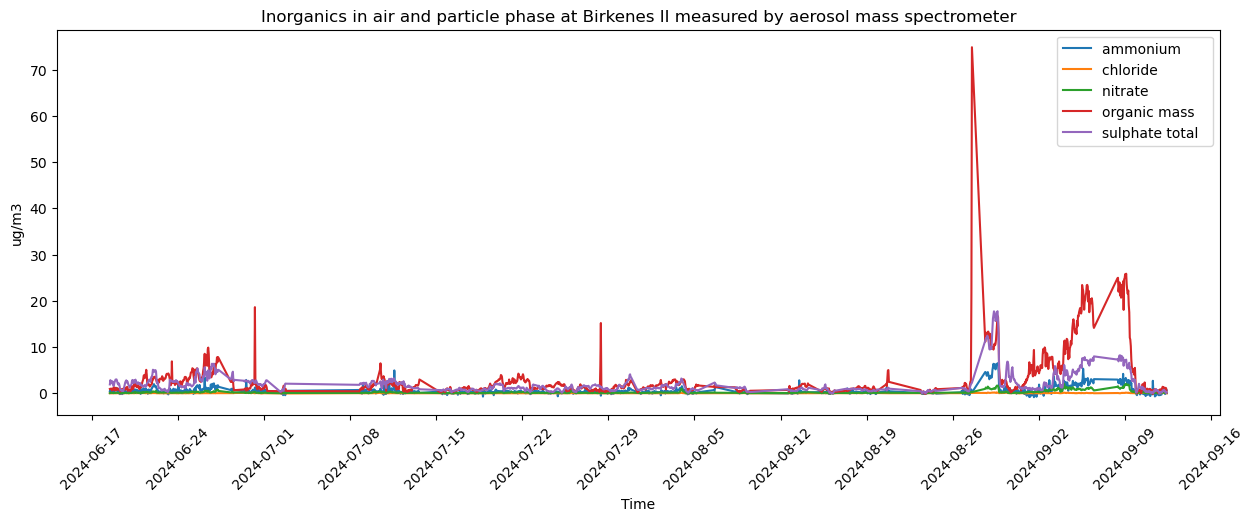

In [8]:
# Define the function to plot variables
def plot_variables(variables, dataset):
    # Set up the figure and axes
    plt.figure(figsize=(15,5))
    plt.xlabel('Time')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
    plt.xticks(rotation=45)
    
    # Iterate over each variable and plot it
    for v in variables:
        units = dataset[v].attrs['units']  # Get the units of the variable
        y = dataset.variables[v].data  # Get the data for the variable
        x = dataset.variables['time'].data  # Get the time data
        plt.plot(x, y, label=v.replace('amean','').replace('ug_per_m3','').replace('_', ' '))  # Plot the variable data
    
    # Set the y-axis label, legend, and title
    plt.ylabel(units)
    plt.legend()
    plt.title('{} measured by {}'.format(dataset.attrs['title'], dataset.attrs['ebas_instrument_type'].replace('_', ' ')))    
    
    # Show the plot
    plt.show()

# Call the function to plot the variables
plot_variables(variables2plot, ds)

Compare plot to NRT data available at https://ebas-nrt.nilu.no/ 

## Take home messages

The notebook demonstrates how to access and analyze ACTRIS (Aerosols, Clouds, and Trace gases Research InfraStructure) In-Situ NRT (Near Real-Time) data using Python. It guides the user through the process of exploring and downloading the ACTRIS In-Situ NRT data, and provides code examples to stream the data, retrieve specific datasets, and inspect the data using Xarray. It demonstrates how to process the data to extract specific variables of interest. Finally, the notebook focuses on data visualization. It provides a function to plot the selected variables over time, using Matplotlib. The resulting plots help in understanding the trends and patterns in the data.

Overall, this notebook provides a hands-on experience in accessing, analyzing, and visualizing ACTRIS In-Situ NRT data. It equips participants with valuable skills in data analysis and visualization, which can be applied to various scientific and research projects.
